A basic introduction to machine learning using the iris dataset. Sources listed as below including code from the kaggle tutorial (https://www.kaggle.com/ash316/ml-from-scratch-with-iris)

In [1]:
import sagemaker as sage
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import check_output
import sklearn
import warnings

In [ ]:
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
input_data = 's3://aphl/Iris.csv'.format('N. Virginia')
iris = pd.read_csv(input_data)

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
#iris.drop("Id", axis=1, inplace = True)

In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Plotting out the data, code taken from
https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation

In [7]:
setosa=iris[iris['Species']=='Iris-setosa']
versicolor =iris[iris['Species']=='Iris-versicolor']
virginica =iris[iris['Species']=='Iris-virginica']

print('Setosa')
print(setosa.describe())
print('Versicolor')
print(versicolor.describe())
print('Virginica')
print(virginica.describe())

Setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000
Versicolor
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.00000

In [8]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


<Figure size 432x288 with 0 Axes>

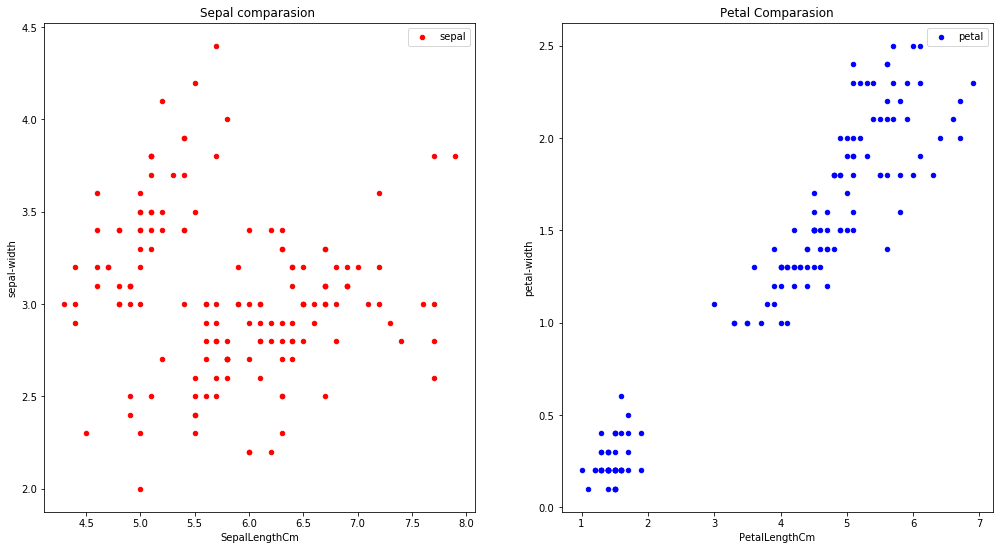

In [9]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
iris.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
iris.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
# plt.show()
# plt.close()

<Figure size 432x288 with 0 Axes>

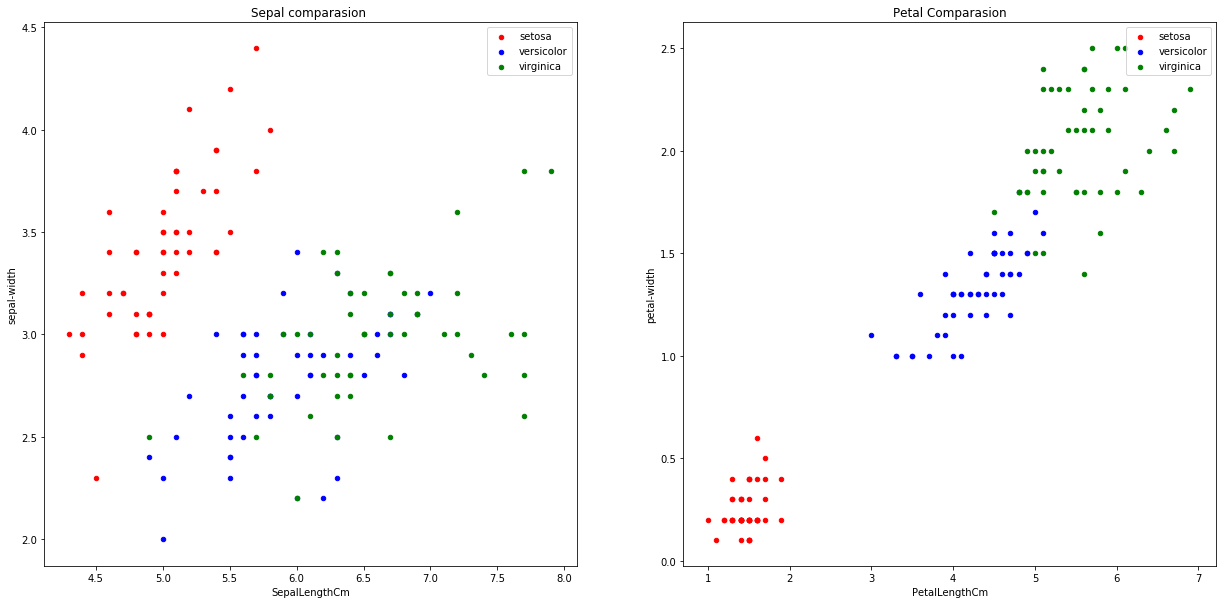

In [10]:
#for each Species ,let's check what is petal and sepal distibutuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

<Figure size 432x288 with 0 Axes>

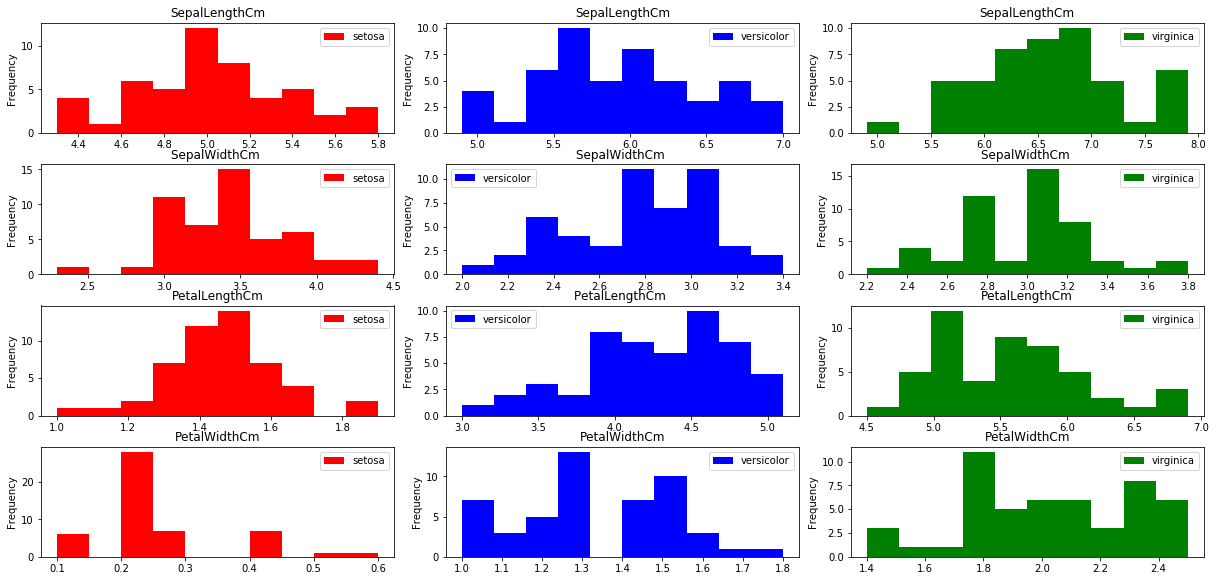

In [11]:
plt.figure()

fig,ax=plt.subplots(4,3,figsize=(17, 8))
setosa["SepalLengthCm"].plot(kind="hist", ax=ax[0][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalLengthCm"].plot(kind="hist", ax=ax[0][1],label="versicolor",color='b',fontsize=10)
virginica["SepalLengthCm"].plot( kind="hist",ax=ax[0][2],label="virginica",color='g',fontsize=10)

setosa["SepalWidthCm"].plot(kind="hist", ax=ax[1][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalWidthCm"].plot(kind="hist", ax=ax[1][1],label="versicolor",color='b',fontsize=10)
virginica["SepalWidthCm"].plot( kind="hist",ax=ax[1][2],label="virginica",color='g',fontsize=10)

setosa["PetalLengthCm"].plot(kind="hist", ax=ax[2][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalLengthCm"].plot(kind="hist", ax=ax[2][1],label="versicolor",color='b',fontsize=10)
virginica["PetalLengthCm"].plot( kind="hist",ax=ax[2][2],label="virginica",color='g',fontsize=10)


setosa["PetalWidthCm"].plot(kind="hist", ax=ax[3][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalWidthCm"].plot(kind="hist", ax=ax[3][1],label="versicolor",color='b',fontsize=10)
virginica["PetalWidthCm"].plot( kind="hist",ax=ax[3][2],label="virginica",color='g',fontsize=10)

plt.rcParams.update({'font.size': 10})
plt.tight_layout()

ax[0][0].set(title='SepalLengthCm')
ax[0][1].set(title='SepalLengthCm')
ax[0][2].set(title='SepalLengthCm')
ax[1][0].set(title='SepalWidthCm ')
ax[1][1].set(title='SepalWidthCm ')
ax[1][2].set(title='SepalWidthCm ')
ax[2][0].set(title='PetalLengthCm')
ax[2][1].set(title='PetalLengthCm ')
ax[2][2].set(title='PetalLengthCm')
ax[3][0].set(title='PetalWidthCm')
ax[3][1].set(title='PetalWidthCm')
ax[3][2].set(title='PetalWidthCm')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[2][2].legend()
ax[3][0].legend()
ax[3][1].legend()
ax[3][2].legend()


plt.show()
plt.close()

Next we need to load in the models we will be testing

See link for when to use each: https://dzone.com/articles/decision-trees-vs-clustering-algorithms-vs-linear

In [15]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [12]:
iris.shape

(150, 6)

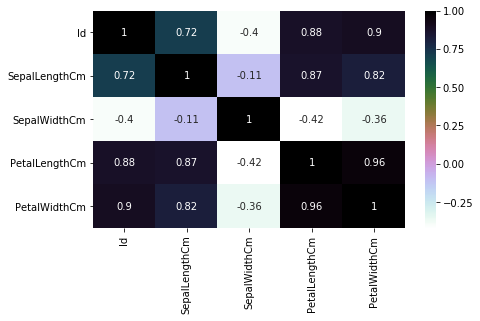

In [13]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [16]:
 train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [17]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [18]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
70,5.9,3.2,4.8,1.8
118,7.7,2.6,6.9,2.3


In [19]:
train_y.head()

70     Iris-versicolor
118     Iris-virginica
4          Iris-setosa
135     Iris-virginica
14         Iris-setosa
Name: Species, dtype: object


Support Vector Machine (SVM)

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

Used for classification and/or regression and is great when you have a large number of features

<img src="SVM untrained.png">
<img src="SVM Trained.png">
source: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

In [20]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 1.0


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Logistic Regression

Logistic regression (aka sigmoid function), similar to linear regression.
nput values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

Equation = y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))
Output = Probability

Should be used when the target variable is categorical and is binary/multinomial


<img src="Logistic Function.png">
source:https://machinelearningmastery.com/logistic-regression-for-machine-learning/

In [21]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



Decision Tree

Can be used for both classification and regression. Basically just a series of questions with thresholds determined by the algorthm.

Should be used for classification dependable variable into groups. 

<img src = 'Decision Tree.png'>
image: wikipedia

source:https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052


In [22]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777



K- Nearest Neighbors

Things that are similar exist in close proximity within a dimensional space. 

<img src= 'K nearest neighbors.png'>

source: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

([<matplotlib.axis.XTick at 0x7fed043507b8>,
 <a list of 10 Text xticklabel objects>)

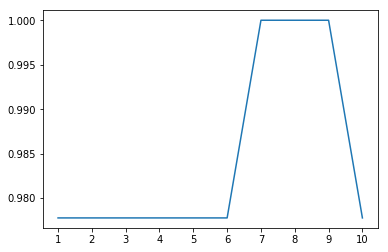

In [23]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

Training on separate data

In [24]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [25]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species



We will first try SVM to determine the accuracy

In [26]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Next lets try Logistic Regression

In [27]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Decision Tree

In [28]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


k-Nearest Neighbors

In [29]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


You can also ensemble the data (using multiple algorthms together) to create a more accurate classification. 

The data makes sense since that was what was predicted from the heat map